<a href="https://colab.research.google.com/github/Gitanjali-63/LGMVIP-Data-Science/blob/main/Task_1_Iris_flower_classification_using_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


In [10]:
#Read the dataset
iris_data=pd.read_csv('iris.data')

In [11]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [23]:
columns= ['SepalLength','SepalWidth','PetalLength','PetalWidth','class']
iris_data.columns = columns
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [22]:
#Exploratory Data Analysis
iris_data.shape

(149, 5)

In [24]:
#Cloumn headings
iris_data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'class'], dtype='object')

In [15]:
#Datatypes in Dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   class        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [25]:
#Summary of the dataset
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
# Checking missing values
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
class          0
dtype: int64

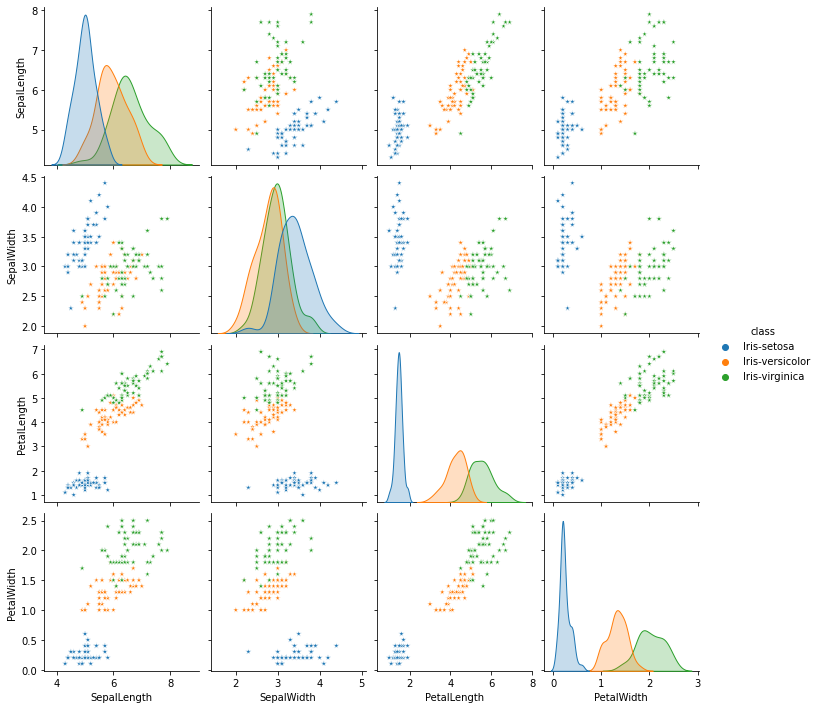

In [20]:
#Data Visualization
#Plotting
sns.pairplot(iris_data,hue='class',markers='*')

In [27]:
# Checking correlation
iris_data.corr()


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.103784,0.871283,0.816971
SepalWidth,-0.103784,1.000000,-0.415218,-0.350733
PetalLength,0.871283,-0.415218,1.000000,0.962314
PetalWidth,0.816971,-0.350733,0.962314,1.000000


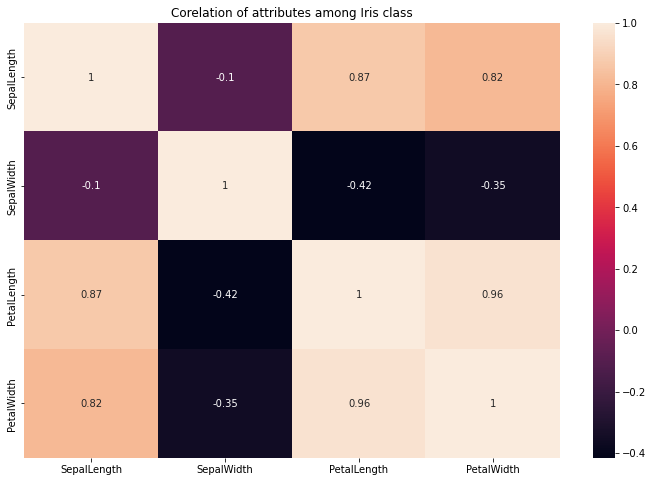

In [28]:
# PLotting it into Heatmap
plt.subplots(figsize = (12, 8))
sns.heatmap(iris_data.corr(), annot = True).set_title("Corelation of attributes among Iris class")
plt.show()

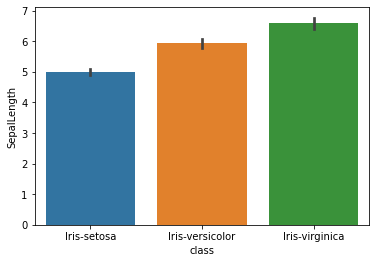

In [30]:
#Data comparision using Barplot
sns.barplot(x='class', y='SepalLength',data=iris_data)

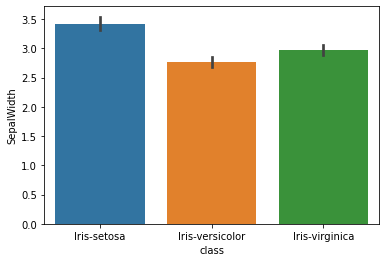

In [31]:
sns.barplot(x='class', y='SepalWidth',data=iris_data)

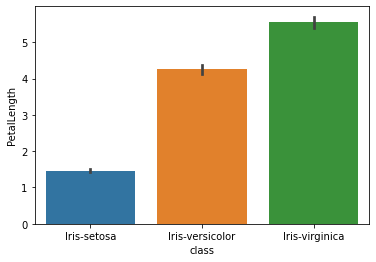

In [32]:
sns.barplot(x='class', y='PetalLength',data=iris_data)

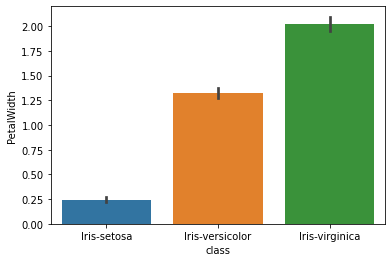

In [33]:
sns.barplot(x='class', y='PetalWidth',data=iris_data)

In [34]:
#Splitting the Dataset
x = iris_data.drop(columns="class")
y = iris_data["class"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=1)

In [38]:
x_train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
12,4.3,3.0,1.1,0.1
2,4.6,3.1,1.5,0.2
97,5.1,2.5,3.0,1.1
112,5.7,2.5,5.0,2.0
103,6.5,3.0,5.8,2.2


In [39]:
x_test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
145,6.3,2.5,5.0,1.9
89,5.5,2.6,4.4,1.2
54,5.7,2.8,4.5,1.3
77,6.0,2.9,4.5,1.5
84,6.0,3.4,4.5,1.6


In [40]:
y_train.head()

12         Iris-setosa
2          Iris-setosa
97     Iris-versicolor
112     Iris-virginica
103     Iris-virginica
Name: class, dtype: object

In [41]:
y_test.head()

145     Iris-virginica
89     Iris-versicolor
54     Iris-versicolor
77     Iris-versicolor
84     Iris-versicolor
Name: class, dtype: object

In [42]:
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

x_train:  89
x_test:  60
y_train:  89
y_test:  60


In [43]:
# Using Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [44]:
predict = model.predict(x_test)
print("Pridicted values on Test Data", predict)

Pridicted values on Test Data ['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-vir

In [45]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [47]:
print("Training Accuracy : ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))

Training Accuracy :  0.9775280898876404
Test Accuracy :  0.95
